Cargando y preparando datos...
Datos listos para graficar.
Generando el gráfico y guardando en 'grafico_05_distribucion_presion.png'...


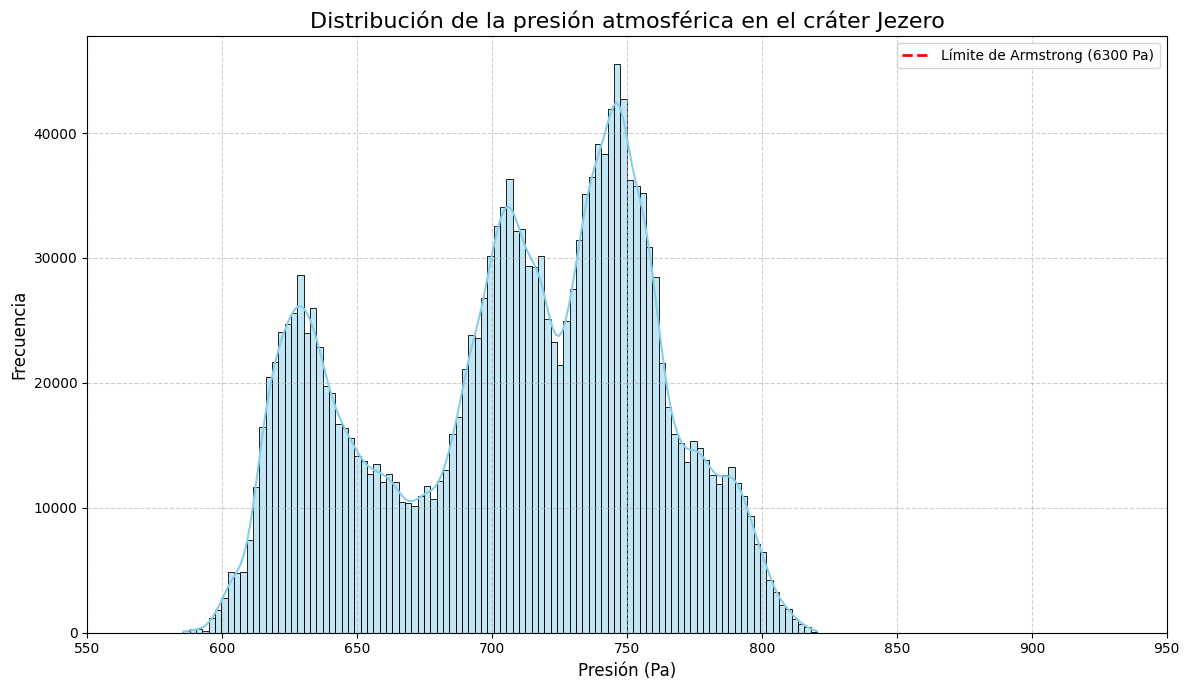

Proceso finalizado. El gráfico fue guardado en 'grafico_05_distribucion_presion.png'.


In [1]:
# -*- coding: utf-8 -*-
"""
Análisis de la distribución de la Presión Atmosférica en Marte.
Carga una muestra de datos, filtra valores atípicos y genera un
histograma detallado de la presión.
"""
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. CONFIGURACIÓN DEL GRÁFICO Y ANÁLISIS ---

# Parámetros del gráfico
TAMAÑO_FIGURA = (12, 7)
RESOLUCION_DPI = 300
NOMBRE_ARCHIVO_SALIDA = "grafico_05_distribucion_presion.png"

# Parámetros del análisis
ARCHIVO_DERIVADO = 'dataset_meda_derived_data.parquet'
TAMAÑO_MUESTRA = 2000000 # Aumentamos la muestra para un histograma más robusto

# --- 2. CARGA Y PREPARACIÓN DE DATOS ---
print("Cargando y preparando datos...")
try:
    df_derived = pd.read_parquet(ARCHIVO_DERIVADO, engine='pyarrow')
    df_derived_sample = df_derived.sample(n=TAMAÑO_MUESTRA, random_state=42)
    # Filtramos valores atípicos y nos quedamos con el rango de presión normal
    df_filtrado = df_derived_sample[df_derived_sample['PRESSURE'] < 2000].dropna(subset=['PRESSURE'])
    print("Datos listos para graficar.")
except Exception as e:
    print(f"Ocurrió un error al cargar los datos: {e}")
    df_filtrado = pd.DataFrame()


# --- 3. CREACIÓN DEL GRÁFICO ---
if not df_filtrado.empty:
    print(f"Generando el gráfico y guardando en '{NOMBRE_ARCHIVO_SALIDA}'...")
    plt.figure(figsize=TAMAÑO_FIGURA)

    sns.histplot(df_filtrado['PRESSURE'], bins=100, kde=True, color='skyblue')
    
    plt.title('Distribución de la presión atmosférica en el cráter Jezero', fontsize=16)
    plt.xlabel('Presión (Pa)', fontsize=12)
    plt.ylabel('Frecuencia', fontsize=12)

    # Añadimos la línea de referencia del Límite de Armstrong
    limite_armstrong = 6300
    plt.axvline(limite_armstrong, color='red', linestyle='--', linewidth=2, label=f'Límite de Armstrong ({limite_armstrong} Pa)')
    
    # Ajustamos la escala del eje X para hacer zoom en la distribución principal
    plt.xlim(550, 950)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()
    plt.tight_layout()

# --- 4. GUARDADO Y VISUALIZACIÓN ---
    plt.savefig(NOMBRE_ARCHIVO_SALIDA, dpi=RESOLUCION_DPI, bbox_inches='tight')
    plt.show()

    print(f"Proceso finalizado. El gráfico fue guardado en '{NOMBRE_ARCHIVO_SALIDA}'.")
else:
    print("No se pudieron generar los datos para el gráfico.")